# USING PANDAS LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests


In [2]:
def currentPrice(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

BTCprice= currentPrice('BTC')
ETCprice=currentPrice('ETC')

print(BTCprice)
print(ETCprice)


{'USD': 8585.88}
{'USD': 31.69}


In [3]:
def minutePriceHistory(cryptoCurrencyTitle, comparisionCurrencyTitle='USD', limit=30, aggregate=1,all_data=False):
    getdetails = requests.get(('https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit=60&aggregate=3&e=CCCAGG').format(cryptoCurrencyTitle,comparisionCurrencyTitle))
    data = getdetails.json()['Data']
    df=pd.DataFrame(data)
    df['timestamp']=[datetime.datetime.fromtimestamp(d) for d in df.time]     
    return df



In [4]:
def plotGraph(cryptoCurrencyTitle, comparisionCurrencyTitle, limit=1, aggregate=1, all_data=False,):
    data = minutePriceHistory(cryptoCurrencyTitle, comparisionCurrencyTitle, limit, aggregate, all_data=False)
   
    plt.plot(data.time, data.close)
    #grid(True)
    plt.title(cryptoCurrencyTitle+' to '+comparisionCurrencyTitle)
    plt.ylabel('Prices in '+comparisionCurrencyTitle)
    plt.xlabel('Time in miliseconds')
    plt.show()
    
      

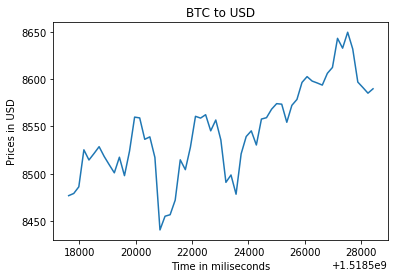

In [5]:
plotGraph('BTC', 'USD',all_data=True)


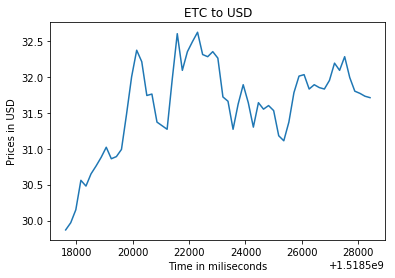

In [6]:
plotGraph('ETC', 'USD',all_data=True)

# #WITHOUT USING PANDAS  

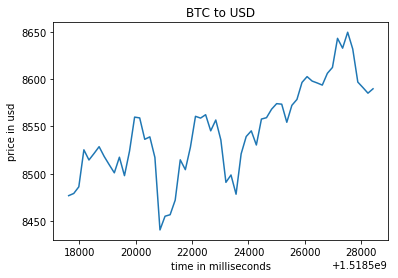

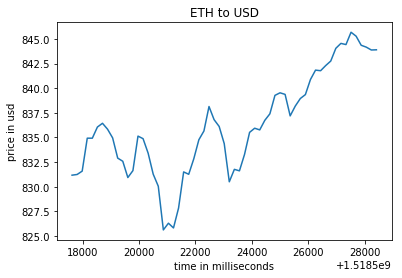

In [7]:


class cryptoDataPlotGraph():
    def __init__(self, *args, **kwargs):
        pass
    
    def plotGraph(self):
        plt.plot(self.time,self.price)
        
        plt.title(self.name+' to '+self.convert)
        plt.xlabel('time in milliseconds')
        plt.ylabel('price in {}'.format(self.convert.lower()))
        plt.show()
        
    def getTimeAndPrice(self):
        self.price=[]
        self.time=[]
        for element in self.data:
            self.time.append(element['time'])
            self.price.append(element['close'])
        self.plotGraph()
        
    def getJsonData(self,url):
        self.response=requests.get(url)
        self.json_response=self.response.json()
        self.data=self.json_response['Data']
        self.getTimeAndPrice()
   
    def urlFormatting(self,cryptoCurrencyTitle,comparisionCurrencyTitle='USD'):
        self.name=cryptoCurrencyTitle.upper()
        self.convert=comparisionCurrencyTitle.upper()
        self.url=('https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit=60&aggregate=3&e=CCCAGG').format(self.name,self.convert)
        self.getJsonData(self.url)   
    
    
def main():
    btc=cryptoDataPlotGraph()
    btc.urlFormatting('BTC','USD')

    etc=cryptoDataPlotGraph()
    etc.urlFormatting('ETH','USD')


if __name__ in ('__main__'):
    main()

# ##RealTimeUpdateofGraph

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


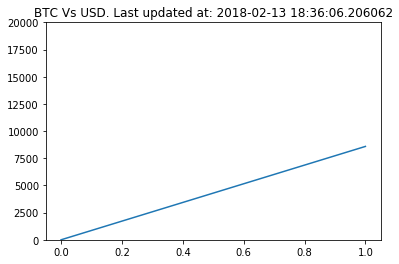

NameError: name 'time' is not defined

In [10]:
import matplotlib.pyplot as plt
import datetime
x=[0]
y=[0]
fig = plt.gcf()
fig.show()
fig.canvas.draw()
plt.ylim([0, 20000])
i=0
while(True):
    data = currentPrice('BTC')
    i+=1
    x.append(i)
    y.append(data['USD'])
    plt.title("BTC Vs USD. Last updated at: "+str(datetime.datetime.now()))
    plt.plot(x,y)
    plt.show()

    fig.canvas.draw()
    plt.pause(500)